In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("C:/Users/psjsi/DataSC_2023/ML/data/homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [4]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [5]:
merged =pd.concat([df, dummies], axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [6]:
# hot encoding rule: just drop  the extra columns. here town is the extra columns. Also as per the HEnoding rule to avoid the data mesh, 
# just delet the newly created one of the columns. foe ex - for the 5 columns we have kept only 5 columns.

final = merged.drop(['town', 'west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
x = final.drop('price', axis='columns')
x

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [9]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [10]:
model.fit(x, y)

LinearRegression()

In [11]:
model.predict([[2800, 0, 1]])

C:\Users\psjsi\DataSC_2023\envs\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [12]:
model.predict([[3400, 0, 0]])

C:\Users\psjsi\DataSC_2023\envs\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [13]:
model.score(x, y)

0.9573929037221872

In [10]:
# one hot encode labels
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
# fit.transform(): method simultaneously performs fit and transform operations on the input data and converts 
# the data points. It take label columns as input and returns the labels

dfle = df
le.fit_transform(dfle.town)

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [13]:
# back the lables into data frames

dfle.town=le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [14]:
x = dfle[['town', 'area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [15]:
y =dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [46]:
# processing for the one hard encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#onehotencoder = OneHotEncoder.categorical_features =[1]
#x = OneHotEncoder().fit_transform(x).toarray()
#x

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])],     remainder='passthrough')
x=np.array(columnTransformer.fit_transform(x))
x
#ohe = OneHotEncoder(categorical_features=[0])

array([[1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 0., 1.,

In [20]:
x = x[:, 1:]
x

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.]])

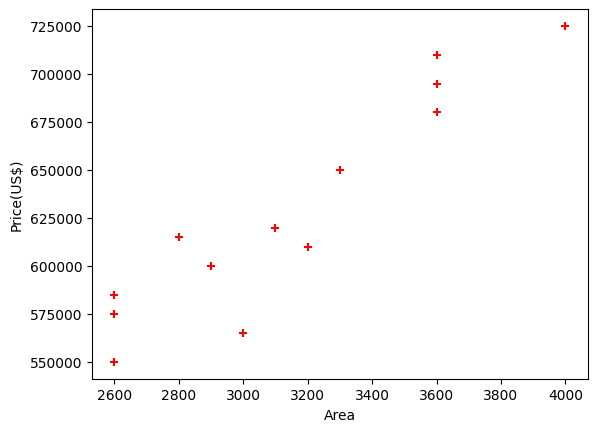

In [27]:
# Liner reression
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price(US$)')
plt.scatter(df.area, df.price, color='red', marker="+")
# plt.plot(df.area, model.predict([df.area]), color='blue')

In [21]:
# coeff of model
model.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [22]:
# intercept of the model 
model.intercept_

np.float64(249790.36766292527)

In [30]:
df1 = pd.read_csv("C:/Users/psjsi/DataSC_2023/ML/data/home_prices.csv")
df1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [31]:
df1.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [34]:
import math
median_bedrooms= math.floor(df1.bedrooms.median())
median_bedrooms

4

In [39]:
# to fill the missing bedrooms values using the medians
df1.bedrooms=df1.bedrooms.fillna(median_bedrooms)
df1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [46]:
# linear regression model for training the data sets
reg = LinearRegression()
reg.fit(df1[['area','bedrooms', 'age']], df1.price)

LinearRegression()

In [47]:
# coefficients
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [49]:
# intercept
reg.intercept_

np.float64(221323.0018654043)

In [50]:
reg.predict([[3000, 3, 40]])

C:\Users\psjsi\DataSC_2023\envs\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [51]:
reg.predict([[2500, 4, 5]])

C:\Users\psjsi\DataSC_2023\envs\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])